# <center>Laboratorium 5<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [2]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*x**(i)
    return y

***Zadanie 1.***  
Zaimplementuj interpolacje pierwszego stopnia. Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji liniowych w poszczególnych przedziałach.

***Podpowiedź***

poszczególne współczynniki przyjmują wartość:

$ a=\frac{y_{k+1}-y_k}{x_{k+1}-x_k}$

$ b=y-a*x_0$

***Przykład***


# This is a polynomial of order <built-in function ord>.
# This is a polynomial of order <built-in function ord>.


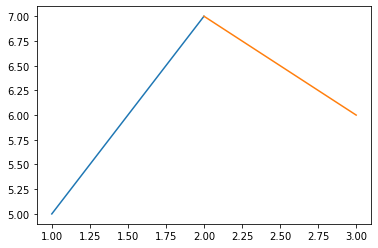

In [2]:
x=np.array([1,2,3])
y=np.array([5,7,6])

a,b=main.first_spline(x,y)
f = [[b[i],a[i]] for i in range(len(a))]

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients(x_new, f[i]))

***Zadanie 2.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.

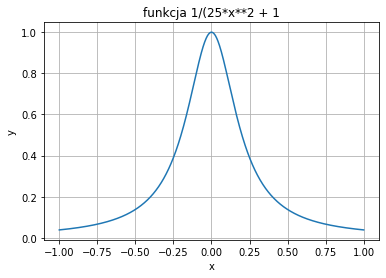

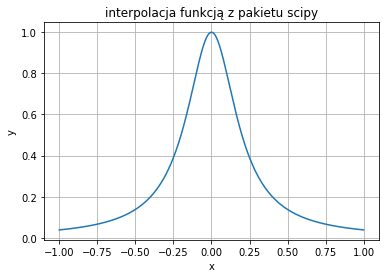

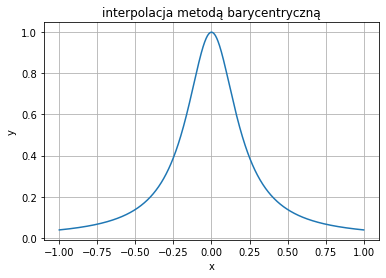

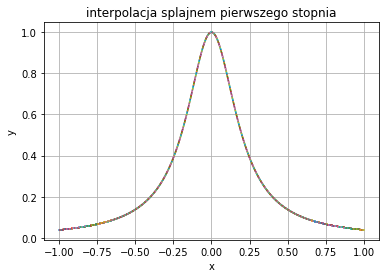

Błąd interpolacji funkcją z pakietu scipy 4.440892098500626e-16
Błąd interpolacji metodą barycentryczną 2.4424906541753444e-15
Błąd interpolacji splajnem 1-wszego stopnia 0.9614392364156117


In [3]:
from scipy import interpolate
from scipy.interpolate import splprep
f1 = lambda x: 1/(25*x**2 + 1)

x = np.linspace(-1,1,1000)
y = f1(x)

plt.figure()
plt.plot(x,y)
plt.title("funkcja 1/(25*x**2 + 1")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

#interpolacja funkcją z pakietu scipy
tck = scipy.interpolate.splrep(x,y)
y_splprep = scipy.interpolate.splev(x, tck)

plt.figure()
plt.plot(x, y_splprep)
plt.title("interpolacja funkcją z pakietu scipy")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

#interpolacja barycentryczna
czeb_w = main.bar_czeb_weights(1000)
x_node = main.chebyshev_nodes(1000)
y_node = f1(x_node)

y_inp = main.barycentric_inte(x_node, y_node, czeb_w, x)

plt.figure()
plt.plot(x, y_inp)
plt.title("interpolacja metodą barycentryczną")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

#interpolacja, splajn pierwszego stopnia
x_spl, y_spl = main.first_spline(x, y)
fspl = [[y_spl[i], x_spl[i]] for i in range(len(x_spl))]
for i in range(len(x) - 1):
    x_new = np.linspace(x[i], x[i+1], 1000)
    y_new = PolyCoefficients(x_new,fspl[i])
    plt.plot(x_new, y_new)
plt.title("interpolacja splajnem pierwszego stopnia")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

#wyznaczenie błędu każdej interpolacji

scipy_int_error = main.L_inf(y, y_splprep)
bar_int_error = main.L_inf(y, y_inp)
spl_int_error = main.L_inf(y, y_new)

print("Błąd interpolacji funkcją z pakietu scipy", scipy_int_error)
print("Błąd interpolacji metodą barycentryczną", bar_int_error)
print("Błąd interpolacji splajnem 1-wszego stopnia", spl_int_error)

Dla interpolacji rzędu 1000, najlepiej wypada funkcja zawarta w pakiecie scipy - błąd w okolicy zera maszynowego.
Minimalnie mniejszą dokładność zapewnia interpolacja barycentryczna. Największy jednak błąd osiąga metoda splajnu pierwszego stopnia -
błąd w okolicach jedności.

***Zadanie 3.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.

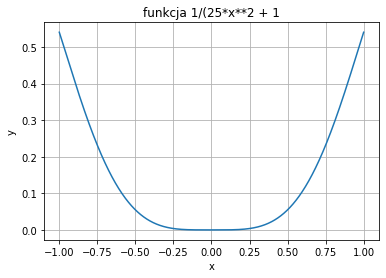

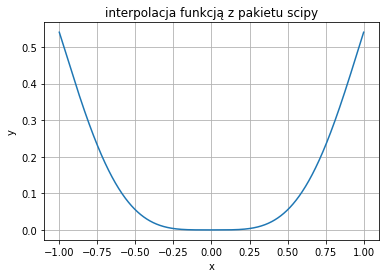

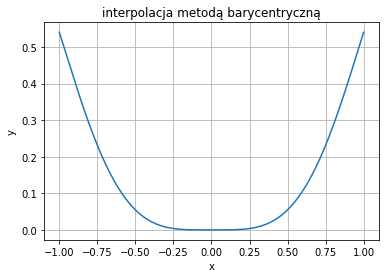

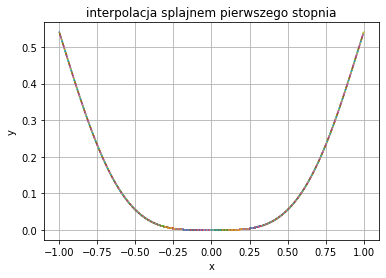

Błąd interpolacji funkcją z pakietu scipy 2.220446049250313e-16
Błąd interpolacji metodą barycentryczną 1.6653345369377348e-15
Błąd interpolacji splajnem 1-wszego stopnia 0.5390490659644633


In [19]:
f2 = lambda x: np.cos(x) * x**4

x = np.linspace(-1,1,1000)
y = f2(x)

plt.figure()
plt.plot(x,y)
plt.title("funkcja 1/(25*x**2 + 1")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

#interpolacja funkcją z pakietu scipy
tck = scipy.interpolate.splrep(x,y)
y_splprep = scipy.interpolate.splev(x, tck)

plt.figure()
plt.plot(x, y_splprep)
plt.title("interpolacja funkcją z pakietu scipy")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

#interpolacja barycentryczna
czeb_w = main.bar_czeb_weights(1000)
x_node = main.chebyshev_nodes(1000)
y_node = f1(x_node)

y_inp = main.barycentric_inte(x_node, y_node, czeb_w, x)

plt.figure()
plt.plot(x, y_inp)
plt.title("interpolacja metodą barycentryczną")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

#interpolacja, splajn pierwszego stopnia
x_spl, y_spl = main.first_spline(x, y)
fspl = [[y_spl[i], x_spl[i]] for i in range(len(x_spl))]
for i in range(len(x) - 1):
    x_new = np.linspace(x[i], x[i+1], 1000)
    y_new = PolyCoefficients(x_new,fspl[i])
    plt.plot(x_new, y_new)
plt.title("interpolacja splajnem pierwszego stopnia")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

#wyznaczenie błędu każdej interpolacji

scipy_int_error = main.L_inf(y, y_splprep)
bar_int_error = main.L_inf(y, y_inp)
spl_int_error = main.L_inf(y, y_new)

print("Błąd interpolacji funkcją z pakietu scipy", scipy_int_error)
print("Błąd interpolacji metodą barycentryczną", bar_int_error)
print("Błąd interpolacji splajnem 1-wszego stopnia", spl_int_error)

Rząd wielkości błędów jest analogiczny jak w poprzednim zadaniu.

***Zadanie 4.***
Zaimplementuj funkcję interpolującą sklejaną trzeciego rzędu (splajn kubiczny). Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji wielomianowych w poszczególnych przedziałach.

***Podpowiedź***

https://medium.com/eatpredlove/natural-cubic-splines-implementation-with-python-edf68feb57aa



***Zadania 5.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.

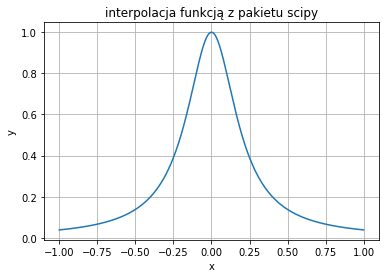

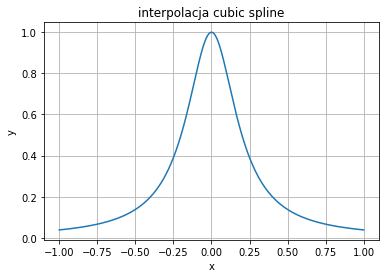

Błąd funkcji z pakietu scipy: 4.440892098500626e-16
Błąd funkcji zaimplementowanej w main: 1.1102230246251565e-16


In [7]:
f1 = lambda x: 1/(25*x**2 + 1)

x = np.linspace(-1,1,1000)
y = f1(x)

tck = scipy.interpolate.splrep(x,y)
y_splprep = scipy.interpolate.splev(x, tck)

plt.figure()
plt.plot(x, y_splprep)
plt.title("interpolacja funkcją z pakietu scipy")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

#funkcja z zadania 4
x_new = np.linspace(-1, 1, 1000)

y_new = main.cubic_spline(x, x_new, y)

plt.figure()
plt.plot(x_new, y_new)
plt.title("interpolacja cubic spline")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

scipy_spl_err = main.L_inf(y_splprep, y)
main_spl_err = main.L_inf(y_new, y)

print("Błąd funkcji z pakietu scipy:", scipy_spl_err)
print("Błąd funkcji zaimplementowanej w main:", main_spl_err)

Jak widać, obie metody odznaczają się błędem w okolicy zera maszynowego. Użyto jednak innej metody implementacji funkcji wykonującej interpolację splajnem kubicznym niżeli zaproponowana w
 podpowiedzi - tamta nie dawała odpowiednich wyników pomimo wielu prób różnego sposobu obróbki danych zwracanych przez w/w funkcję. Nadpisanie funkcji PolyCoefficients w taki sposób, żeby uwzględniała
 ona początek przedziału x1 tj. według wzoru S1 = y1 + b1(x-x1) + c1(x-x1)^2 + d1(x-x1)^3 także nie generowało zadowalających wyników.

***Zadanie 6.***
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.

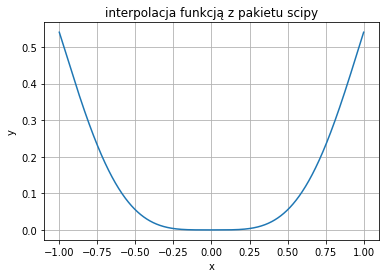

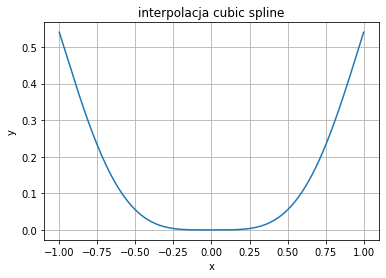

Błąd funkcji z pakietu scipy: 2.220446049250313e-16
Błąd funkcji zaimplementowanej w main: 1.1102230246251565e-16


In [8]:
f2 = lambda x: np.cos(x)*x**4

x = np.linspace(-1,1,1000)
y = f2(x)

tck = scipy.interpolate.splrep(x,y)
y_splprep = scipy.interpolate.splev(x, tck)

plt.figure()
plt.plot(x, y_splprep)
plt.title("interpolacja funkcją z pakietu scipy")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

#funkcja z zadania 4
x_new = np.linspace(-1, 1, 1000)

y_new = main.cubic_spline(x, x_new, y)

plt.figure()
plt.plot(x_new, y_new)
plt.title("interpolacja cubic spline")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

scipy_spl_err = main.L_inf(y_splprep, y)
main_spl_err = main.L_inf(y_new, y)

print("Błąd funkcji z pakietu scipy:", scipy_spl_err)
print("Błąd funkcji zaimplementowanej w main:", main_spl_err)

Podobnie jak w przypadku poprzedniego zadania - błąd w okolicy zera maszynowego

***Zadanie 7.***  
Dla funkcji:
### $f(x) = |sin(5x)|^3$

Porównać działanie funkcji zaimplementowanych w Zadaniu 1 oraz 4 oraz przedstawić wyniki na odpowiednich wykresach.


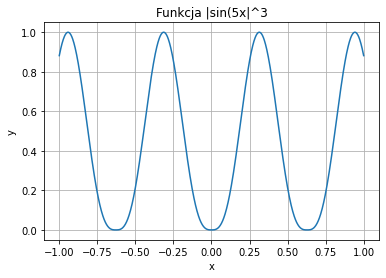

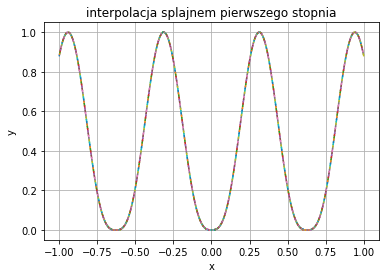

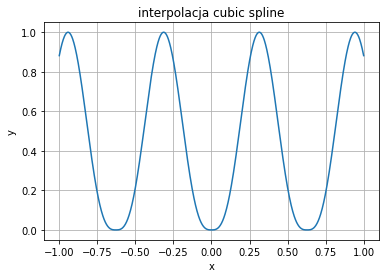

Błąd funkcji spline 1-wszego stopnia: 2.220446049250313e-16
Błąd funkcji cubic spline: 1.1102230246251565e-16


In [14]:
f3 = lambda x: np.abs(np.sin(5*x))**3

#interpolacja spline 1-wszego stopnia
x = np.linspace(-1, 1, 1000)
y = f3(x)

plt.figure()
plt.plot(x,y)
plt.title("Funkcja |sin(5x|^3")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

x_first, y_first = main.first_spline(x,y)
f_first = [[y_first[i], x_first[i]] for i in range(len(x_first))]

for i in range(len(x) - 1):
    x_new = np.linspace(x[i], x[i+1], 1000)


x_spl, y_spl = main.first_spline(x, y)
fspl = [[y_spl[i], x_spl[i]] for i in range(len(x_spl))]
for i in range(len(x) - 1):
    x_new = np.linspace(x[i], x[i+1], 1000)
    y_new = PolyCoefficients(x_new,fspl[i])
    plt.plot(x_new, y_new)
plt.title("interpolacja splajnem pierwszego stopnia")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

#interpolacja cubic_spline
x_new = np.linspace(-1, 1, 1000)

y_new_cubic = main.cubic_spline(x, x_new, y)

plt.figure()
plt.plot(x_new, y_new_cubic)
plt.title("interpolacja cubic spline")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

main_first_err = main.L_inf(y_new, y)
main_spl_err = main.L_inf(y_new_cubic, y)

print("Błąd funkcji spline 1-wszego stopnia:", scipy_spl_err)
print("Błąd funkcji cubic spline:", main_spl_err)